# 線形回帰

## お品書き
- 単回帰
- 多項式回帰
- 過学習と正則化

# 単回帰

## 単回帰の前提
- 直線で近似できるという仮定

## データの準備

In [1]:
# 必要なモジュールをimport
from random import randint

import matplotlib.pyplot as plt
import numpy as np

np.random.seed(24)  # 乱数を固定
np.set_printoptions(precision=4)  # 表示する桁数の設定

%matplotlib inline

In [2]:
# 10個のデータを生成する
# 真の分布は y = 2 + 3x + ε (ε: ノイズ)

N = 10

X = np.random.rand(N, 1)
y = 2 + 3 * X + np.random.rand(N, 1)

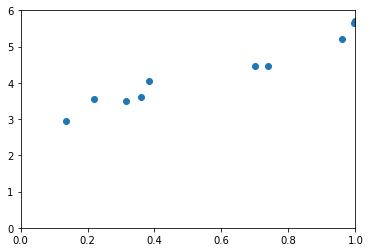

In [3]:
# 可視化
plt.scatter(X, y)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 6.0)

plt.show()

## 目標
- 上記のデータになるべくフィットするような直線を引くこと

In [4]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X, y.ravel())
# linear_regression.fit(X, y.reshape(-1)) # これでもOK

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
# 真の分布は 傾き:3 切片:2 だから、そこそこ良さそう
linear_regression.coef_, linear_regression.intercept_

(array([2.7738]), 2.706246038441874)

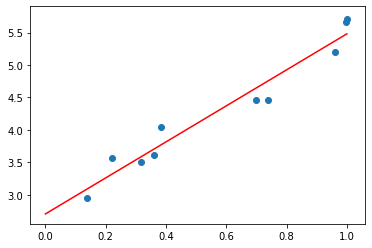

In [6]:
plt.plot([0, 1],
         linear_regression.intercept_ + linear_regression.coef_ * [0, 1],
         "red")

plt.scatter(X, y)

## データを増やすとモデルの性能が向上する

In [7]:
# 200個のデータを生成する
# 真の分布は y = 2 + 3x + ε (ε: ノイズ)
N = 300

X = np.random.rand(N, 1)
y = 2 + 3 * X + np.random.rand(N, 1)

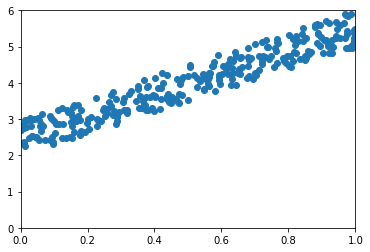

In [8]:
# 可視化
plt.scatter(X, y)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 6.0)

plt.show()

In [9]:
linear_regression = LinearRegression()

linear_regression.fit(X, y.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
linear_regression.coef_, linear_regression.intercept_

(array([2.9456]), 2.5099080354300276)

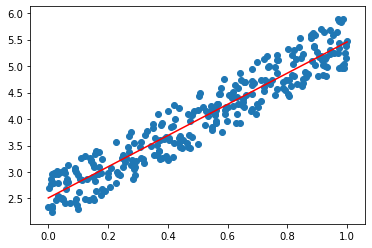

In [11]:
plt.plot([0, 1],
         linear_regression.intercept_ + linear_regression.coef_ * [0, 1],
         "red")

plt.scatter(X, y)

# 単回帰では対応できない曲線

## こんなデータがあったとさ

In [12]:
N = 10

X = np.linspace(0, 1, N)
noise = np.random.uniform(low=-1.0, high=1.0, size=N) * 0.3

# 真の分布: y = sin(2πx) + ε
y = np.sin(2.0 * np.pi * X) + noise

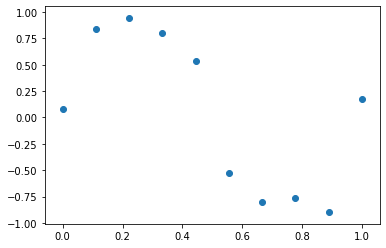

In [13]:
# 可視化
plt.scatter(X, y)

plt.show()

## 真の分布を確認する
- リアルな問題において「真の分布」を知ることはできない。
- これはあくまで練習問題

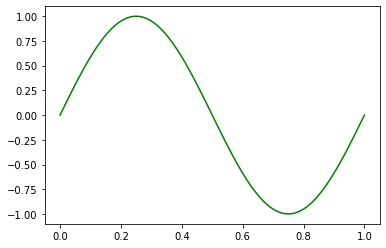

In [14]:
Xs = np.linspace(0, 1, 100)  # 区間[0, 1]で100個のデータをつくる

sinX = np.sin(2.0 * np.pi * Xs)

plt.plot(Xs, sinX, color="green")

plt.show()

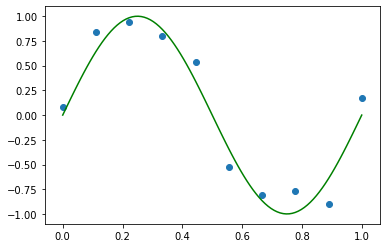

In [15]:
# 観測したデータと重ねてみる
plt.scatter(X, y)
plt.plot(Xs, sinX, color="green")

plt.show()

## 単回帰でやってみる

In [16]:
linear_regression = LinearRegression()

linear_regression.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
coef = linear_regression.coef_  # 係数
intercept = linear_regression.intercept_  # 切片

print(intercept, coef)

0.740266288858259 [-1.4061]


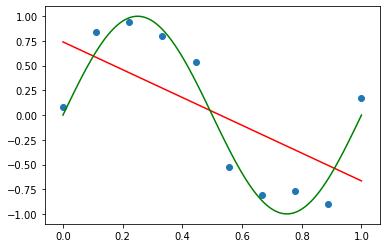

In [18]:
# 可視化
plt.plot(Xs, intercept + coef * Xs, color="red")

plt.scatter(X, y)
plt.plot(Xs, sinX, color="green")

plt.show()

### 観察
- だめだこりゃ

## 2次までの多項式でやってみる
- 使う変数(説明変数)は同じく x のみ
- y = c + ax + bx^2 

In [19]:
X2 = X ** 2

In [20]:
X_new = np.concatenate([X.reshape(-1, 1), X2.reshape(-1, 1)], axis=1)

X_new.shape

(10, 2)

In [21]:
linear_regression2 = LinearRegression()

linear_regression2.fit(X_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
coef = linear_regression2.coef_  # 係数
intercept = linear_regression2.intercept_  # 切片

print(intercept, coef)

0.7944864292409359 [-1.7721  0.366 ]


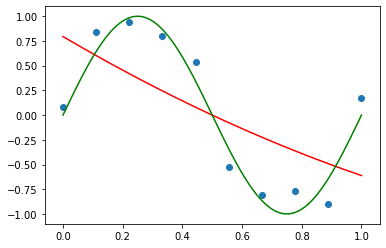

In [23]:
# 可視化
plt.plot(Xs,
         intercept + coef[0] * Xs + coef[1] * Xs ** 2,
         color="red")

plt.scatter(X, y)
plt.plot(Xs, sinX, color="green")

plt.show()

### 観察
- 若干カーブしている
- さっきよりよくなった？ とも思えない。複雑度が足りない

## 3次元の項までとる
- 次数をあげることで複雑度を向上させる(≒カーブに対応させる)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

poly.fit(X.reshape(-1, 1))

X3 = poly.transform(X.reshape(-1, 1))

In [25]:
linear_regression3 = LinearRegression().fit(X3, y)

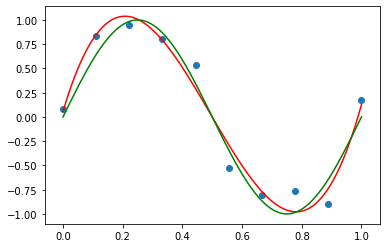

In [26]:
X3 = poly.fit_transform(Xs.reshape(-1, 1))

plt.plot(Xs, linear_regression3.predict(X3), color="red")

plt.scatter(X, y)
plt.plot(Xs, sinX, color="green")

plt.show()

### 観察
- だいぶいい感じ！

## ほかの次数も一気に試す
- さらに次数を増やせばもっと当てはまりがよくなるのでは？

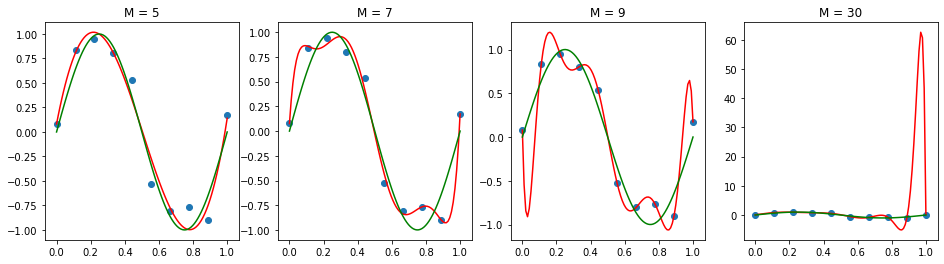

In [27]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for degree, ax in zip([5, 7, 9, 30], axes):
    poly = PolynomialFeatures(degree)

    X_poly = poly.fit_transform(X.reshape(-1, 1))

    linear_regression = LinearRegression().fit(X_poly, y)

    Xs_poly = poly.fit_transform(Xs.reshape(-1, 1))

    ax.plot(Xs, linear_regression.predict(Xs_poly), color="red")
    ax.set_title(f"M = {degree}")
    ax.scatter(X, y)
    ax.plot(Xs, sinX, color="green")

plt.show()

### 観察
- 次数を大きくしすぎると過学習がおきる
    - 全ての点を通過するようになる
    - 係数が大きくなりすぎる


# 過学習の対策その1: データを増やす

In [28]:
N = 100

X = np.linspace(0, 1, N)
noise = np.random.uniform(low=-1.0, high=1.0, size=N) * 0.3

# 真の分布: y = sin(2πx) + ε
y = np.sin(2.0 * np.pi * X) + noise

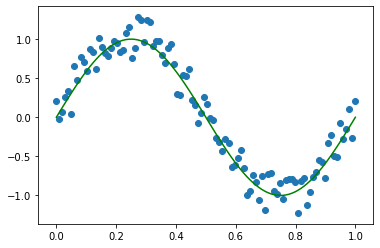

In [29]:
# 可視化
plt.scatter(X, y)
plt.plot(Xs, sinX, color="green")

plt.show()

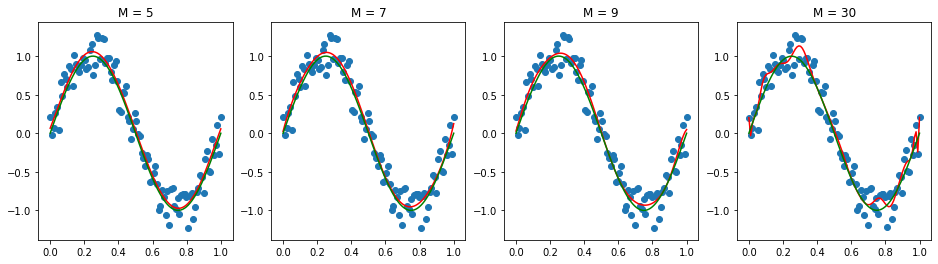

In [30]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for degree, ax in zip([5, 7, 9, 30], axes):
    poly = PolynomialFeatures(degree)

    X_poly = poly.fit_transform(X.reshape(-1, 1))

    linear_regression = LinearRegression().fit(X_poly, y)

    Xs_poly = poly.fit_transform(Xs.reshape(-1, 1))

    ax.plot(Xs, linear_regression.predict(Xs_poly), color="red")
    ax.set_title(f"M = {degree}")
    ax.scatter(X, y)
    ax.plot(Xs, sinX, color="green")

plt.show()

## 観察
- 次数が大きくなったときの過学習が抑制されているのが分かる

# 過学習の対策その2: 正則化

In [31]:
# 再びデータ数を10にする
N = 10

X = np.linspace(0, 1, N)
noise = np.random.uniform(low=-1.0, high=1.0, size=N) * 0.3

# 真の分布: y = sin(2πx) + ε
y = np.sin(2.0 * np.pi * X) + noise

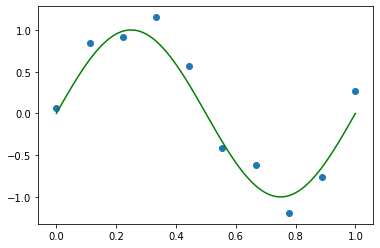

In [32]:
# 観測したデータと重ねてみる
plt.scatter(X, y)
plt.plot(Xs, sinX, color="green")

plt.show()

## リッジ回帰

### 次数と正則化の関係

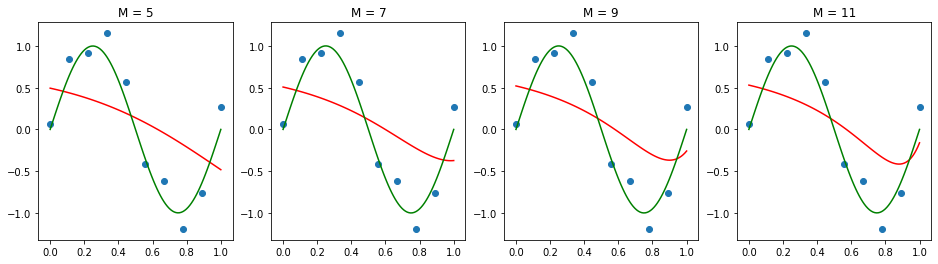

In [33]:
from sklearn.linear_model import Ridge

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for degree, ax in zip([5, 7, 9, 11], axes):
    poly = PolynomialFeatures(degree)

    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # alpha によって正則化の度合いを制御する
    ridge = Ridge().fit(X_poly, y)

    Xs_poly = poly.fit_transform(Xs.reshape(-1, 1))

    ax.plot(Xs, ridge.predict(Xs_poly), color="red")
    ax.set_title(f"M = {degree}")
    ax.scatter(X, y)
    ax.plot(Xs, sinX, color="green")

plt.show()

### alphaの違いを確認する

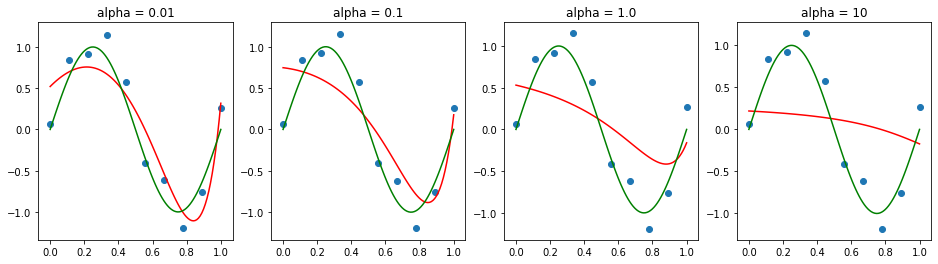

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for alpha, ax in zip([0.01, 0.1, 1.0, 10], axes):
    poly = PolynomialFeatures(degree=11)  # 11次の多項式

    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # alpha によって正則化の度合いを制御する
    ridge = Ridge(alpha=alpha).fit(X_poly, y)

    Xs_poly = poly.fit_transform(Xs.reshape(-1, 1))

    ax.plot(Xs, ridge.predict(Xs_poly), color="red")
    ax.set_title(f"alpha = {alpha}")
    ax.scatter(X, y)
    ax.plot(Xs, sinX, color="green")

plt.show()

## ラッソ回帰

### ラッソ回帰での正則化

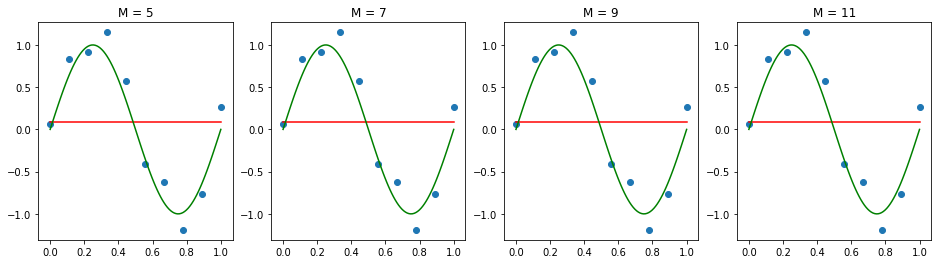

In [35]:
from sklearn.linear_model import Lasso

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for degree, ax in zip([5, 7, 9, 11], axes):
    poly = PolynomialFeatures(degree)

    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # alpha によって正則化の度合いを制御する
    lasso = Lasso().fit(X_poly, y)

    Xs_poly = poly.fit_transform(Xs.reshape(-1, 1))

    ax.plot(Xs, lasso.predict(Xs_poly), color="red")
    ax.set_title(f"M = {degree}")
    ax.scatter(X, y)
    ax.plot(Xs, sinX, color="green")

plt.show()

### alphaによる違い

/Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019306948757827902, tolerance: 0.0005744128580000924
  positive)


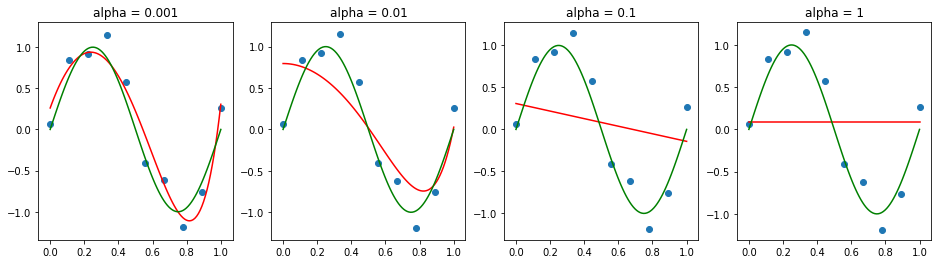

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for alpha, ax in zip([0.001, 0.01, 0.1, 1], axes):
    poly = PolynomialFeatures(degree=7)

    X_poly = poly.fit_transform(X.reshape(-1, 1))

    # alpha によって正則化の度合いを制御する
    lasso = Lasso(alpha=alpha).fit(X_poly, y)

    Xs_poly = poly.fit_transform(Xs.reshape(-1, 1))

    ax.plot(Xs, lasso.predict(Xs_poly), color="red")
    ax.set_title(f"alpha = {alpha}")
    ax.scatter(X, y)
    ax.plot(Xs, sinX, color="green")

plt.show()

## リッジ回帰 と ラッソ回帰 の係数を比較

In [37]:
poly = PolynomialFeatures(degree=7)

X_poly = poly.fit_transform(X.reshape(-1, 1))

ridge = Ridge(alpha=0.01).fit(X_poly, y)
lasso = Lasso(alpha=0.01).fit(X_poly, y)

# 両者の係数を比較する
print("Ridge:", ridge.coef_)
print("Lasso:", lasso.coef_)  # 係数がゼロになる

Ridge: [ 0.      2.2272 -4.3179 -3.1772 -0.9574  0.8793  2.1417  2.9298]
Lasso: [ 0.      0.     -3.1864 -0.     -0.      0.      0.      2.4178]
